In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading CSV file
vehicles_fuel_economy_df = pd.read_csv('vehicles_fuel_economy.csv')
vehicles_fuel_economy_df.head()

/var/folders/33/q3lrlg0s6ps9l_cy6hmqj_bh0000gn/T/ipykernel_37378/3358762818.py:2: DtypeWarning: Columns (72,74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicles_fuel_economy_df = pd.read_csv('vehicles_fuel_economy.csv')


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,27.046364,0.0,0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,11.018889,0.0,0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,27.046364,0.0,0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,15.658421,0.0,0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [3]:
#Including necessary columns and renaming them
new_fuel_economy_df = vehicles_fuel_economy_df[['drive', 'year','city08', 'highway08', 'comb08', 'co2TailpipeGpm', 'cylinders', 'displ', 'make', 'model', 'startStop', 'VClass', 'phevBlended']].copy()
new_fuel_economy_df = new_fuel_economy_df.rename(columns={'city08': 'city', 'highway08': 'highway', 'comb08' : 'comb'})

#Replacing values with boolean values
new_fuel_economy_df['startStop'] = new_fuel_economy_df['startStop'].notna()



new_fuel_economy_df

,drive,year,city,highway,comb,co2TailpipeGpm,cylinders,displ,make,model,startStop,VClass,phevBlended
0,Rear-Wheel Drive,1985,19,25,21,423.190476,4.0,2.0,Alfa Romeo,Spider Veloce 2000,False,Two Seaters,False
1,Rear-Wheel Drive,1985,9,14,11,807.909091,12.0,4.9,Ferrari,Testarossa,False,Two Seaters,False
2,Front-Wheel Drive,1985,23,33,27,329.148148,4.0,2.2,Dodge,Charger,False,Subcompact Cars,False
3,Rear-Wheel Drive,1985,10,12,11,807.909091,8.0,5.2,Dodge,B150/B250 Wagon 2WD,False,Vans,False
4,4-Wheel or All-Wheel Drive,1993,17,23,19,467.736842,4.0,2.2,Subaru,Legacy AWD Turbo,False,Compact Cars,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47102,Front-Wheel Drive,1993,19,26,22,403.954545,4.0,2.2,Subaru,Legacy,False,Compact Cars,False
47103,Front-Wheel Drive,1993,20,28,23,386.391304,4.0,2.2,Subaru,Legacy,False,Compact Cars,False
47104,4-Wheel or All-Wheel Drive,1993,18,24,21,423.190476,4.0,2.2,Subaru,Legacy AWD,False,Compact Cars,False
47105,4-Wheel or All-Wheel Drive,1993,18,24,21,423.190476,4.0,2.2,Subaru,Legacy AWD,False,Compact Cars,False


In [4]:
#Finding correlation
corr_df = new_fuel_economy_df[['city', 'highway', 'comb', 'co2TailpipeGpm', 'cylinders', 'displ']].copy()
corr_df.corr()

,city,highway,comb,co2TailpipeGpm,cylinders,displ
city,1.000000,0.960508,0.993883,-0.726922,-0.672849,-0.703733
highway,0.960508,1.000000,0.983509,-0.819953,-0.646841,-0.704425
comb,0.993883,0.983509,1.000000,-0.771950,-0.680191,-0.721716
co2TailpipeGpm,-0.726922,-0.819953,-0.771950,1.000000,0.741494,0.790758
cylinders,-0.672849,-0.646841,-0.680191,0.741494,1.000000,0.905502
displ,-0.703733,-0.704425,-0.721716,0.790758,0.905502,1.000000


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
/Users/jasonrahimi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


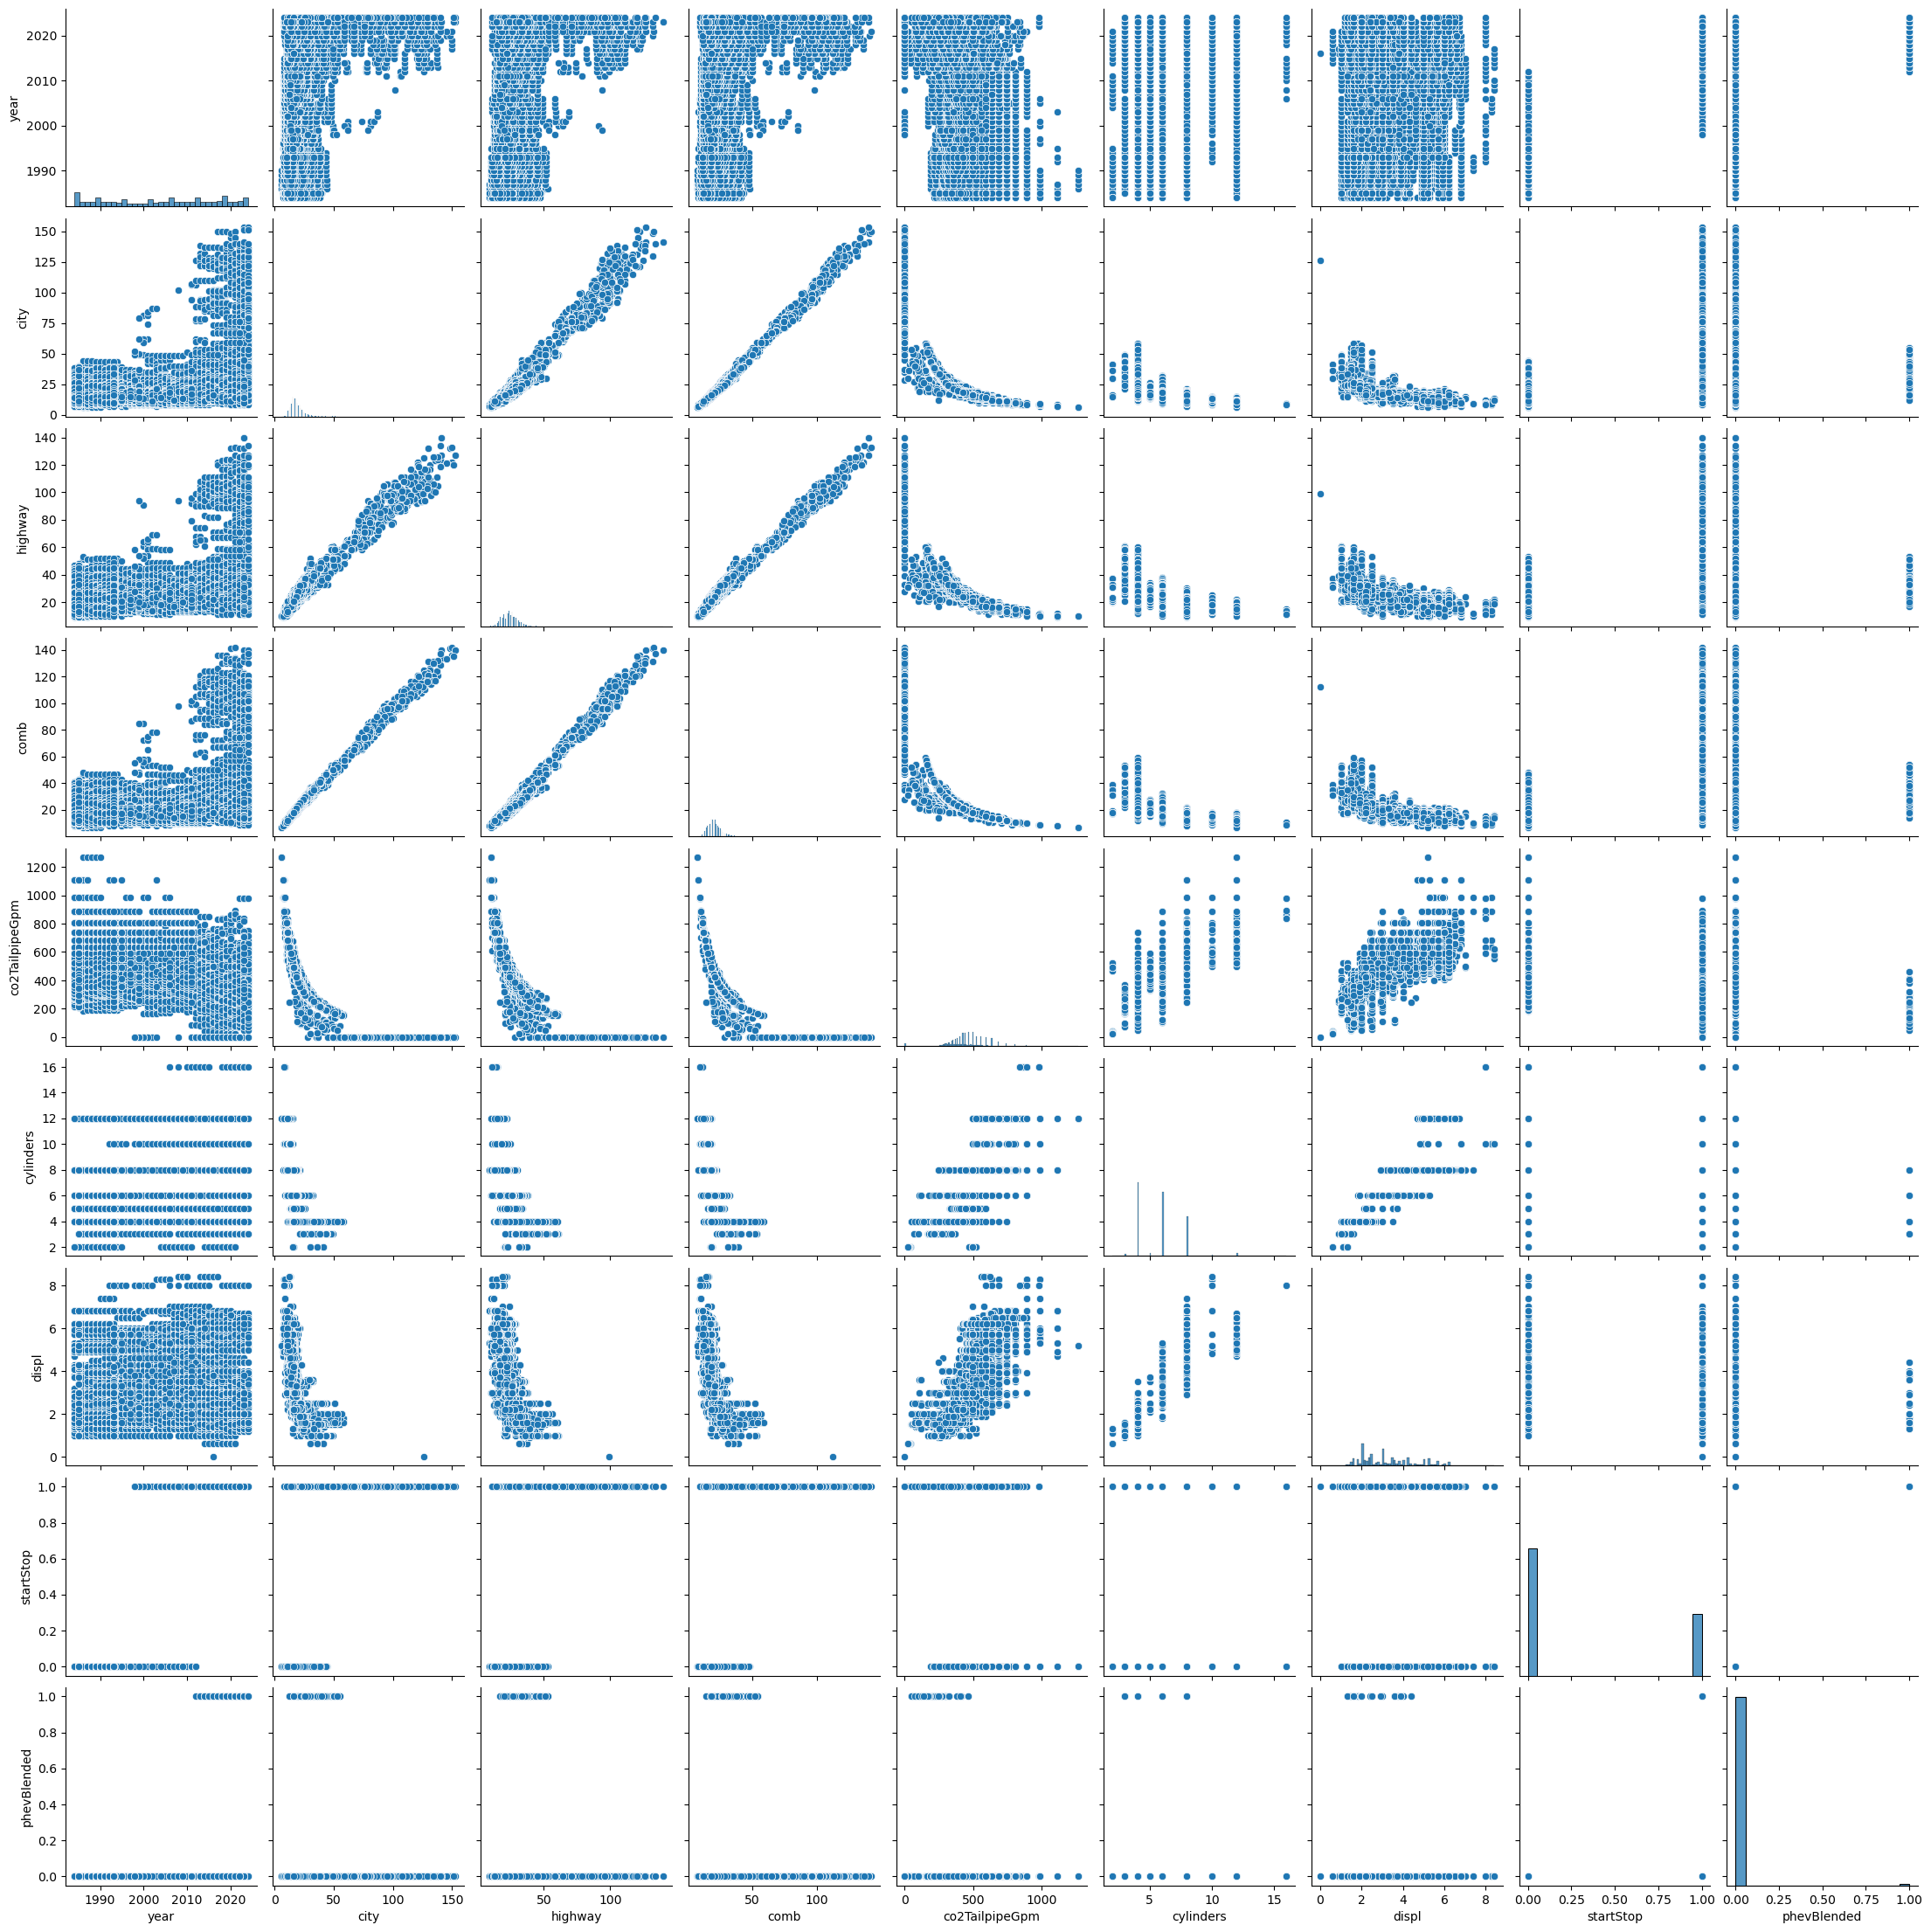

In [5]:
#Plotting values
sns.pairplot(new_fuel_economy_df)

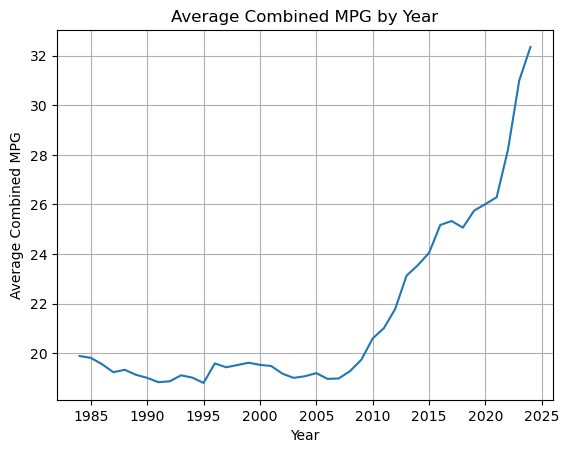

In [6]:
#Developing plot for average combined MPG by year
yearly_mpg = new_fuel_economy_df.groupby('year')['comb'].mean()
plt.plot(yearly_mpg)
plt.xlabel('Year')
plt.ylabel('Average Combined MPG')
plt.title('Average Combined MPG by Year')
plt.grid(True)
plt.show()

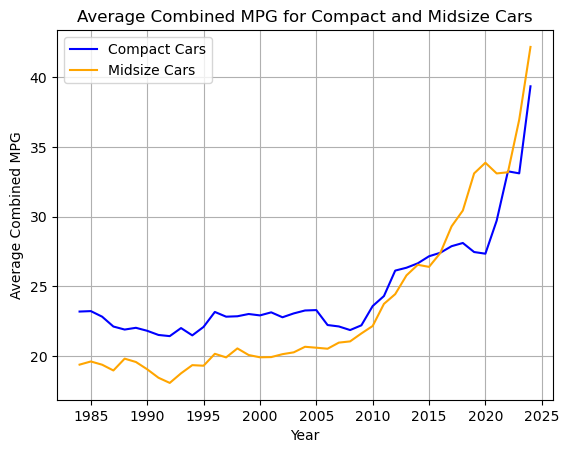

In [7]:
#Plotting average combined MPG for compact and midsize cars by year
Vclass_compact_df = new_fuel_economy_df[new_fuel_economy_df['VClass'] == 'Compact Cars']
avg_compact_combined = Vclass_compact_df.groupby('year')['comb'].mean()
plt.plot(avg_compact_combined.index, avg_compact_combined.values, color = 'blue', label = 'Compact Cars')

Vclass_midsize_df = new_fuel_economy_df[new_fuel_economy_df['VClass'] == 'Midsize Cars']
avg_midsize_combined = Vclass_midsize_df.groupby('year')['comb'].mean()
plt.plot(avg_midsize_combined.index, avg_midsize_combined.values, color = 'orange', label = 'Midsize Cars')

plt.xlabel('Year')
plt.ylabel('Average Combined MPG')
plt.title('Average Combined MPG for Compact and Midsize Cars')
plt.grid(True)
plt.legend()
plt.show()

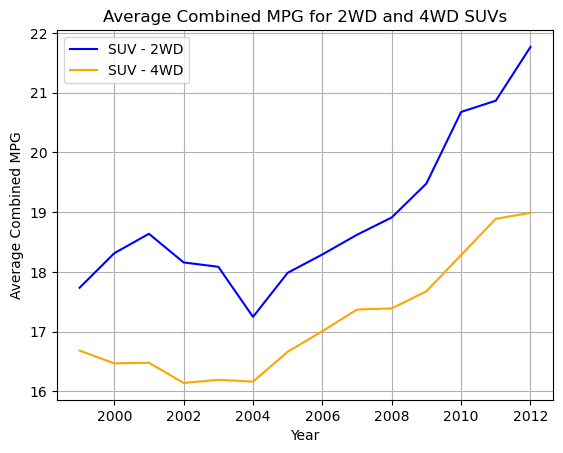

In [8]:
#Plotting average combined MPG for 2WD and 4WD SUVs by year
Vclass_2WD_df = new_fuel_economy_df[new_fuel_economy_df['VClass'] == 'Sport Utility Vehicle - 2WD']
avg_2WD_combined = Vclass_2WD_df.groupby('year')['comb'].mean()
plt.plot(avg_2WD_combined.index, avg_2WD_combined.values, color = 'blue', label= 'SUV - 2WD')

Vclass_4WD_df = new_fuel_economy_df[new_fuel_economy_df['VClass'] == 'Sport Utility Vehicle - 4WD']
avg_4WD_combined = Vclass_4WD_df.groupby('year')['comb'].mean()
plt.plot(avg_4WD_combined.index, avg_4WD_combined.values, color = 'orange', label = 'SUV - 4WD')

plt.xlabel('Year')
plt.ylabel('Average Combined MPG')
plt.title('Average Combined MPG for 2WD and 4WD SUVs')
plt.grid(True)
plt.legend()
plt.show()